# Clustering K-means
1. **클러스터(Cluster)** : 비슷한 특성을 가진 데이터들끼리 묶는 것
2. **클러스터링(clustering)**
 - 데이터들을 군집으로 묶어주는 작업
 - 라벨링된 데이터를 묶는 작업으로 <span style ='color:dodgerblue'>비지도 학습으로 분류</span>
3. **K-means Clustering**
 - 각 클러스터에 할당된 데이터 포인터들의 <span style ='color:dodgerblue'>평균좌표를 이용해 중심점을 반복적으로 업데이트</span>하며 클러스터를 형성하는 알고리즘
 - <span style ='color:dodgerblue'>**k는 군집의 개수를 의미, 사용자가 조정해야하는 하이퍼파라미터**</span>
4. **중심점, 도심(Centroid)** : 클러스터의 중심
5. **K-means 수행과정**
 - <span style ='color:dodgerblue'>**클러스터의 수(k) 결정**</span> : n_clusters
 - <span style ='color:dodgerblue'>**init 파라미터**</span>: 기본값(k-means++)방식으로 centroid1, 2, ...n개 찾음
 - centroid1에서 제일 멀리 떨어져 있는 데이터를 centroid2로, 이들과 제일 멀리 떨어진것을 다음 centroid로 찾는 방식
 - 각 데이터마다 가장 가까운 중심점에 해당되는 클러스터에 할당(중심점 거리계산은 유클리드 방식)
 - 할당된 클러스터를 기반으로 새로운 중심점 계산
  > 클러스터의 중심으로 centroid 이동 -> 새로운 중심점(배부점들의 거리 산술평균)
 - 각 클러스터의 할당이 변하지 않을때까지 위의 작업을 반복

# library loading

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('axes', unicode_minus=False)
mpl.rcParams['font.family'] = 'batang'

sns.set_style('dark') # 노트
sns.set(color_codes=True)
plt.rc('figure', figsize=(10,8))

warnings.filterwarnings('ignore')

# Dataset load

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

## EDA

In [4]:
data= wine.data
label = wine.target
columns = wine.feature_names

df= pd.DataFrame(data, columns=columns)
df.shape

(178, 13)

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Preprocessing_featurescaler

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.loc[:,:] = scaler.fit_transform(data)

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## PCA(주성분 분석을 통한 특성 줄이기)
- **n_component**의 입력매개변수값에 따라 두가지 동작을 수행한다.
- 만약 매개변수의 값이 1보다 크면 그 수만큼 특성이 반환(차원변환된 결과), 0~1사이면 그 수만큼 신뢰도를 반영하는 방법으로 특성변환
- 이때, 최적의 특성 개수는 어떻게 정할까?
 - 원본 특성의 95% 또는 98%의 분산을 유지한다는 의미로 n_components에 0.95를 담음
- **whiten = True**, 각 주성분의 값을 평균이 0이고 분산이 1이되도록 반영
- **solver = 'randomized**'는 아주 짧은 시간안에 첫번쨰 주성분을 찾아주는 확률적 알고리즘 사용

In [6]:
# 차원축소
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
data = pca.fit_transform(data)
data.shape

(178, 2)

In [7]:
df['pca_x'] = data[:,0]
df['pca_y'] = data[:,1]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831


In [8]:
# explained_variance_ratio_ : 전체 변동성에서 개별 PCA컴포넌트별 차지하는 변동성 비율
pca.explained_variance_ratio_
## 원본데이터의 56퍼정도 가량만 설명이 가능함

array([0.36198848, 0.1920749 ])

## K-means로 클러스터 찾기

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=109)

In [10]:
kmeans.fit(data) #fitting

KMeans(n_clusters=3, random_state=109)

In [11]:
pred = kmeans.predict(data)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
df['cluster'] = pred
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,1


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

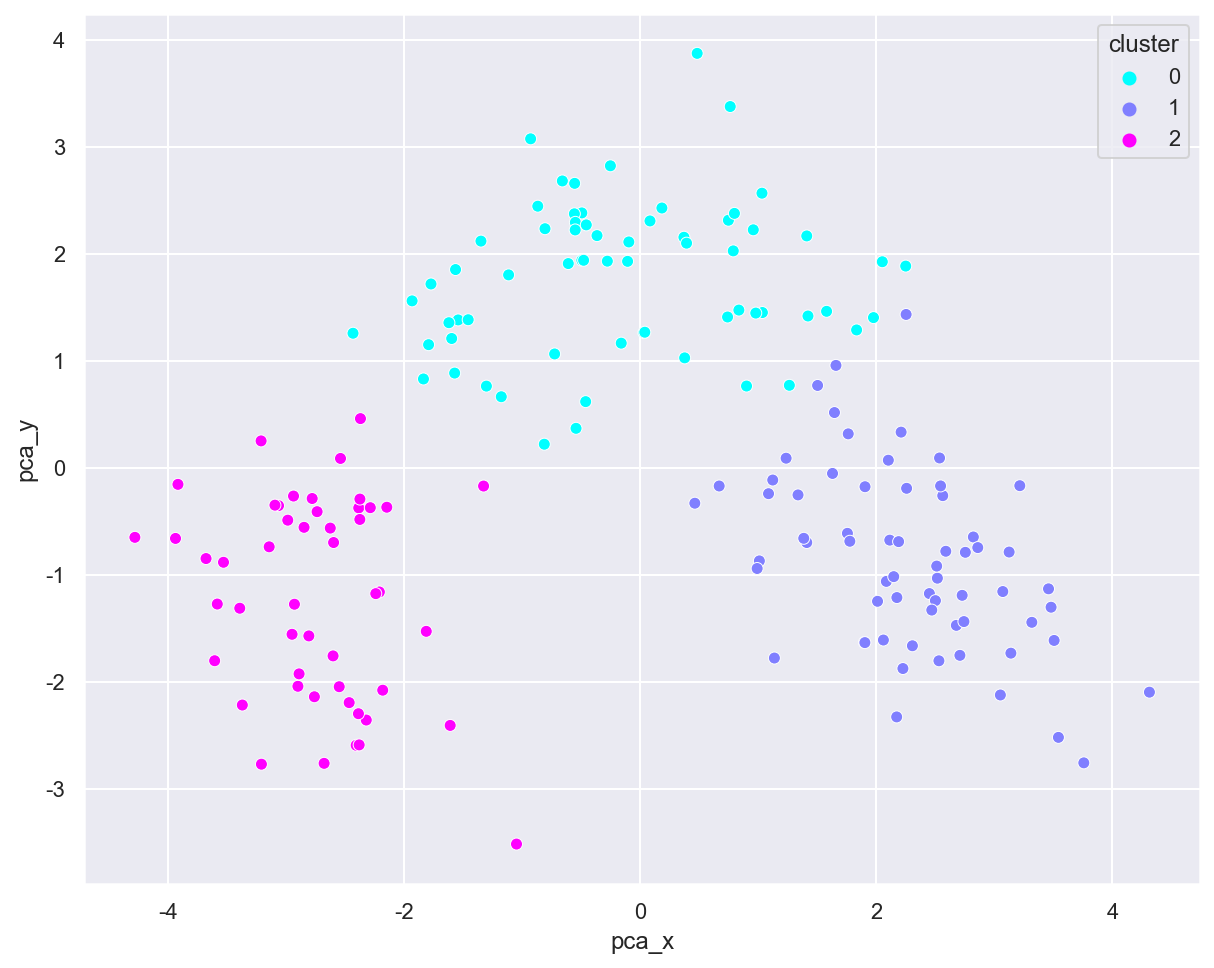

In [13]:
sns.scatterplot(x='pca_x', y='pca_y', data = df, hue = 'cluster', palette='cool')

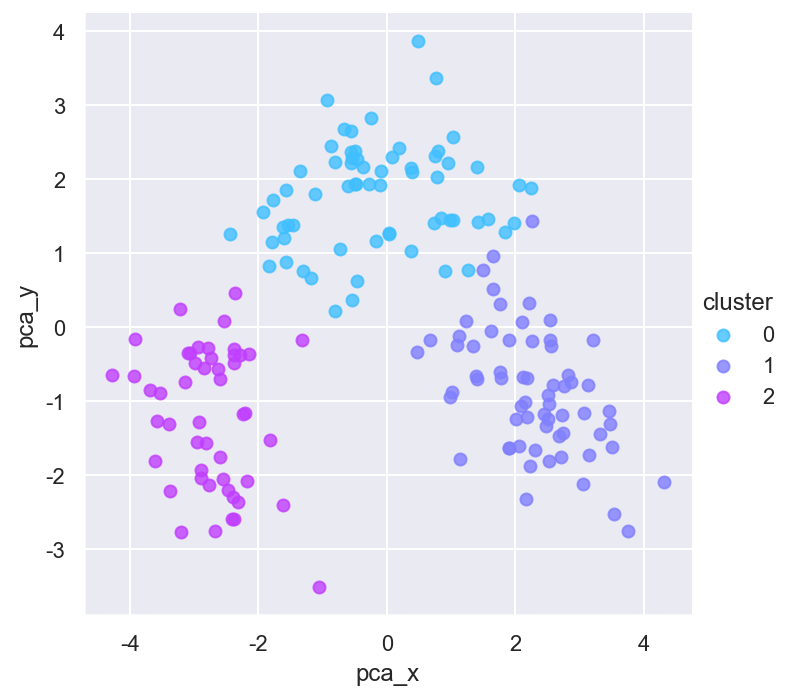

In [22]:
sns.lmplot(x='pca_x', y='pca_y', data=df, hue='cluster', fit_reg=False, palette='cool')

## 중심점도 포함한 시각화 구현

In [14]:
#cluster_centers_ : 중심점의 좌표값
center = kmeans.cluster_centers_
center

array([[-0.16278513,  1.76758824],
       [ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ]])

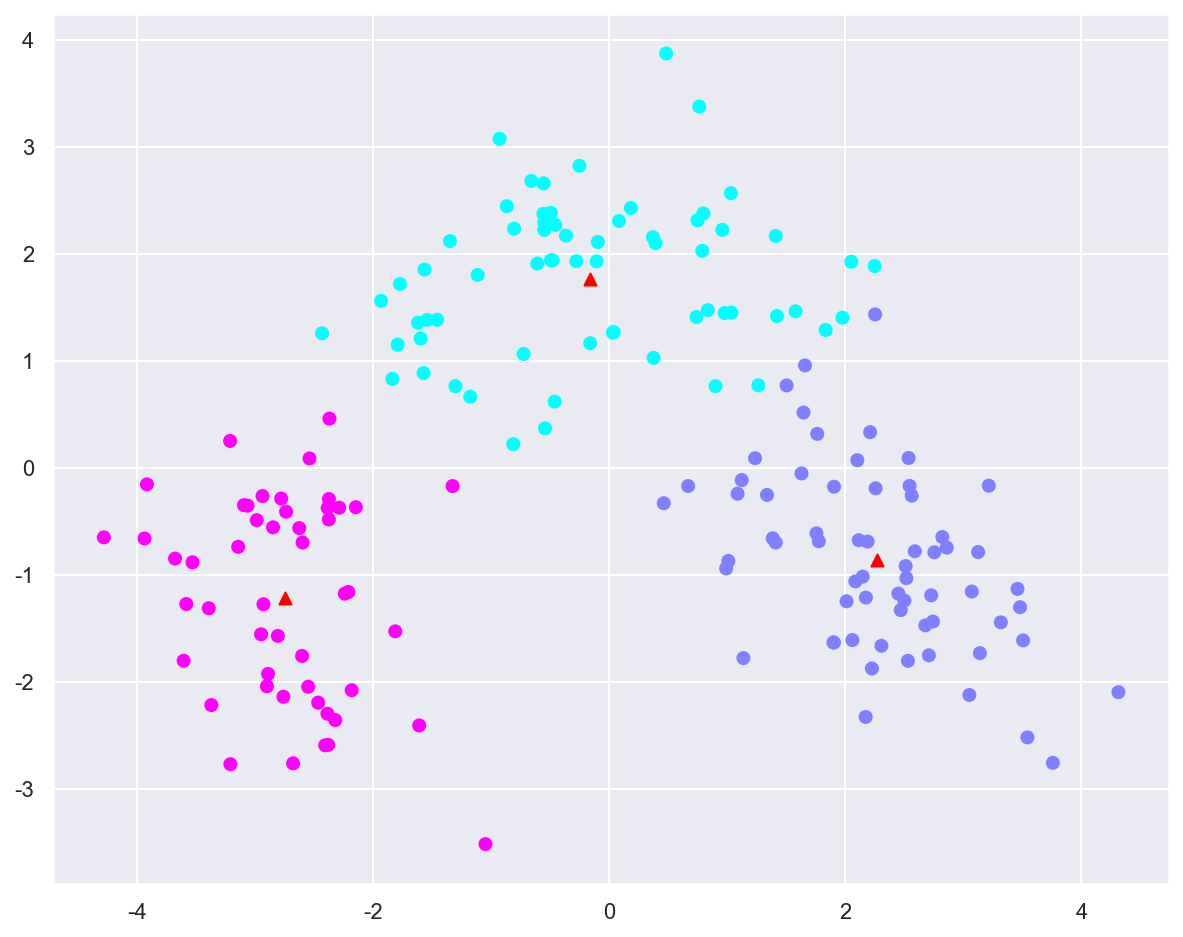

In [15]:
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'], cmap='cool')
plt.scatter(center[:,0], center[:,1], c='red', marker='^')
plt.show()

## 적절한 군집의 수, 최적의 k찾기
- k-means 알고리즘의 단점 중 하나는 클러스터의 개수를 사전에 지정해야한다는 것.
- 사실 군집알고리즘에서 적절한 k를 찾기위한 완벽한 방법은 없다. 다만, **대표적인 방법중 하나인 엘보우 방법**이 존재한다.

## Elbow Method
- k-means 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다.
- 이때 측정한 거리를 제곱합 하여 구한것이 이너셔(inertia)
- **inertia** : 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값.
- 일반적으로 클러스터의 개수가 늘어나면 클러서터 각각의 거리 크기는 줄어들기 때문에 이너셔도 줄어듬.
- **엘보우 방법**
 > 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법.
- 클러스터 개수를 증가시키면서 이너셔를 시각화하면 감속하는 속도가 꺽이는 지점이 有
 > 이지점부터 클러스터개수를 늘려도 클러스터에 잘 밀집된 정도가 크개 개선되지 않음.<br>
   즉, 이너셔가 크게 줄어들지않는 지점이 존재 이지점이 팔꿈치 모양과 닮아서 엘보우 방법
- k-means 클래스는 자동으로 이너셔를 계산해서 **inertia_**라는 속성에 담음.
 

In [16]:
inertia = []

for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=109)
    km.fit(data)
    iner = km.inertia_
    inertia.append(iner)
    
    print('k: {}, cost : {}'.format(k, iner))
    
inertia = np.array(inertia)

k: 2, cost : 628.7883507554774
k: 3, cost : 259.5093807511933
k: 4, cost : 192.39061530234858
k: 5, cost : 155.7250245052225
k: 6, cost : 123.3683708953935
k: 7, cost : 99.23553010259232
k: 8, cost : 89.20287759316713
k: 9, cost : 80.7802133240595
k: 10, cost : 73.72113531332874
k: 11, cost : 66.73435491056165
k: 12, cost : 58.611032980805966
k: 13, cost : 53.44575953808003
k: 14, cost : 50.39120825153742
k: 15, cost : 46.6464290877448


## Elbow 시각화_inertia

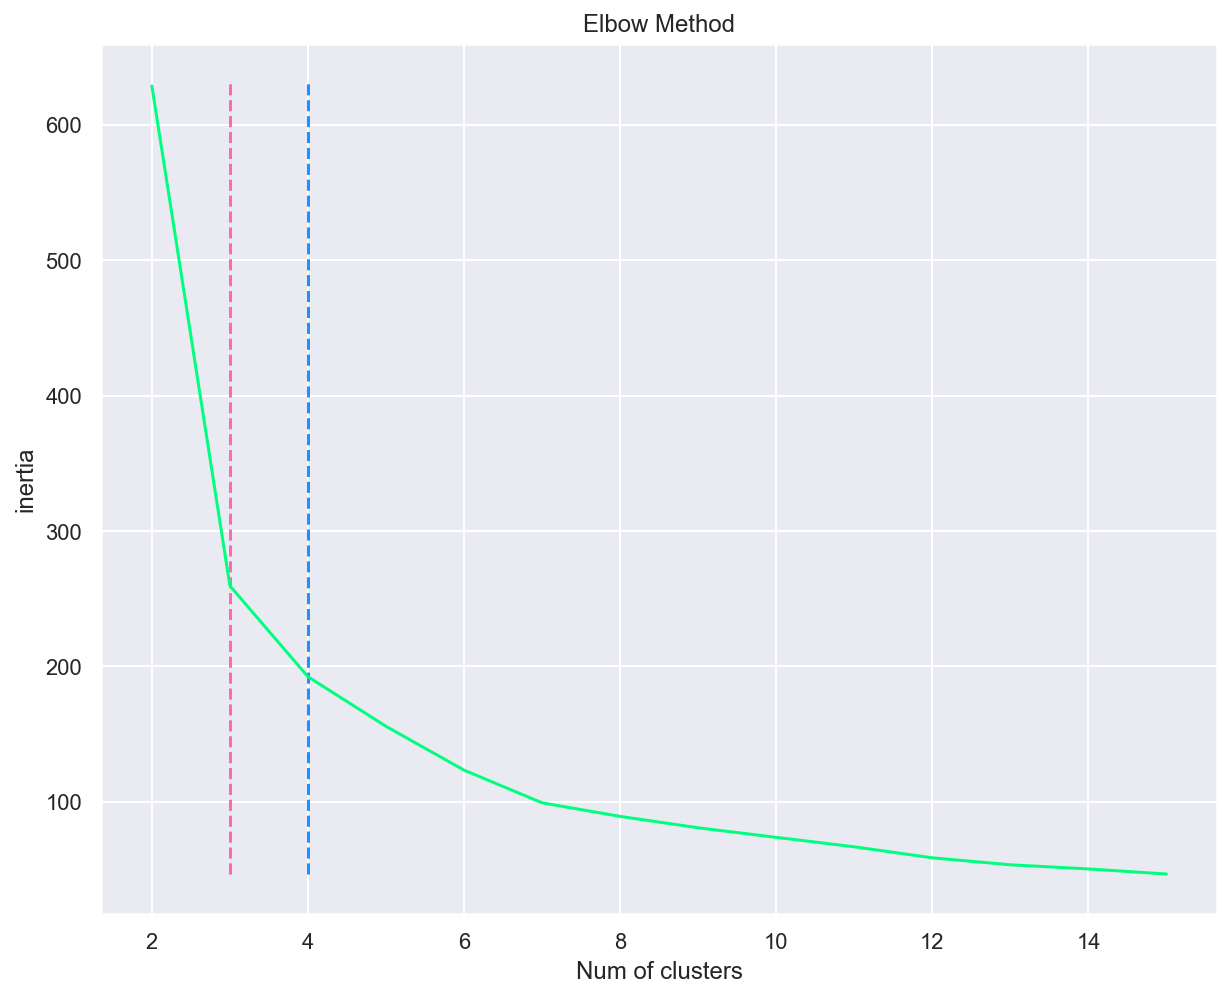

In [17]:
plt.plot(range(2,16), inertia, color='springgreen')
plt.vlines(3, ymin= inertia.min()*0.999, ymax=inertia.max()*1.003, linestyle='--',
          color='hotpink')
plt.vlines(4, ymin= inertia.min()*0.999, ymax=inertia.max()*1.003, linestyle='--',
          color='dodgerblue')
plt.title('Elbow Method')
plt.xlabel('Num of clusters')
plt.ylabel('inertia')
plt.show()

- 딱 꺽인 지점으로 판단하였을때 3 또는 4가 괜찮겠군.
- 비지도 학습이라 정답은 없음,

## 군집 평가
- 군집화는 분류와 유사해보이지만 성격이 다름.
- **데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여함.**
- 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하기도 함.
- <span style = 'color:dodgerblue'>**실루엣 분석**</span>
  > 군집화가 효율적으로 잘 되었는지 평가할수 있는 대표적인 방법.<br>
    다만, 비지도학습의 특성상 어떤 지표라도 정확하게 성능을 평가하긴 어렵고, 기술자가 판단

## 실루엣 분석
- k를 평가하는 법 중 하나, 계수의 평균값이 1에 가까울수록 군집화가 잘되었다고 판단
- 실루엣 분석은 다른 군집과의 거리는 떨어져있고 동일 군집 데이터끼리 서로 가까운지를 나타낸다.
- 실루엔 분석은 실루엣 계수를 기반으로 하며 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다.
- 단점: 데이터가 많으면 시간이 오래걸림

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2, random_state=109)

In [19]:
from sklearn.metrics import silhouette_score
k_range = range(2,30)

best_k = -1
best_silhouette_score = -1

for k in k_range:
    km = KMeans(n_clusters = k, random_state=109)
    km.fit(data)
    clusters= km.predict(data)
    
    score = silhouette_score(data, clusters)
    
    print('k: {}, score: {}'.format(k, score))
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score
        
print('\n best K: {}, best Score: {}'.format(best_k, best_silhouette_score))

k: 2, score: 0.46491409089201524
k: 3, score: 0.5610505693103246
k: 4, score: 0.4914213395710316
k: 5, score: 0.45592446199131964
k: 6, score: 0.4483651644133676
k: 7, score: 0.42346688583178366
k: 8, score: 0.4083729282475445
k: 9, score: 0.3929422021159147
k: 10, score: 0.39879813117002944
k: 11, score: 0.4008360608324262
k: 12, score: 0.407631282062142
k: 13, score: 0.4120793108260558
k: 14, score: 0.3883745790278355
k: 15, score: 0.4158666450855473
k: 16, score: 0.3981218250889091
k: 17, score: 0.374686539583856
k: 18, score: 0.3726497978462164
k: 19, score: 0.3695897490048031
k: 20, score: 0.39001086297066423
k: 21, score: 0.35300332025405423
k: 22, score: 0.3775758561666607
k: 23, score: 0.38681619725872585
k: 24, score: 0.3449979276302444
k: 25, score: 0.3649893759793721
k: 26, score: 0.34985376687254494
k: 27, score: 0.3705092798571733
k: 28, score: 0.3486206555588938
k: 29, score: 0.3600735153699703

 best K: 3, best Score: 0.5610505693103246


In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples
k_range = range(2,30)

best_k = -1
best_silhouette_score = -1

for k in k_range:
    km = KMeans(n_clusters = k, random_state=109)
    km.fit(X_train)
    clusters= km.predict(X_train)
    
    score = silhouette_score(X_train, clusters)
    
    print('k: {}, score: {}'.format(k, score))
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score
        
print('\n best K: {}, best Score: {}'.format(best_k, best_silhouette_score))

k: 2, score: 0.6644170998686028
k: 3, score: 0.5793719815118572
k: 4, score: 0.5611322143180121
k: 5, score: 0.5529302133760899
k: 6, score: 0.5709470092837395
k: 7, score: 0.5664037453096102
k: 8, score: 0.5292791680715452
k: 9, score: 0.5278753940267245
k: 10, score: 0.5123008455560659
k: 11, score: 0.5120698179482133
k: 12, score: 0.518940063994531
k: 13, score: 0.5087523862289562
k: 14, score: 0.5112328609846952
k: 15, score: 0.4981116755887862
k: 16, score: 0.48857877001640104
k: 17, score: 0.47926748368427785
k: 18, score: 0.48463773681875905
k: 19, score: 0.4783780710810021
k: 20, score: 0.4762184685200516
k: 21, score: 0.4619948887885861
k: 22, score: 0.45991714822227997
k: 23, score: 0.45077541639415253
k: 24, score: 0.4255652067828447
k: 25, score: 0.45100712855306757
k: 26, score: 0.4348685263647399
k: 27, score: 0.44457892304440555
k: 28, score: 0.4457963782190773
k: 29, score: 0.42206940065816595

 best K: 2, best Score: 0.6644170998686028


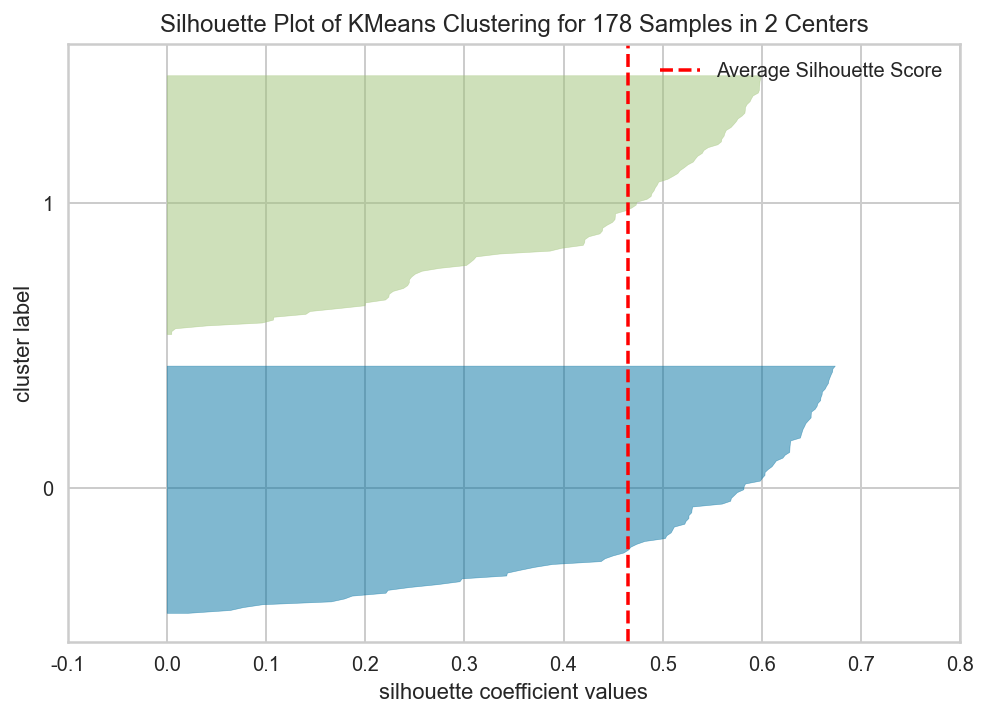

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer
#클러스터링 모델 생성
kmeans_2 = KMeans(n_clusters=2, random_state=111,init='random')
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(data)      
visualizer_2.show()

In [5]:
! pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [43]:
! pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asgiref                            3.5.2
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 